<a href="https://colab.research.google.com/github/sudarshanmestha/Python-learning/blob/main/Tablet_model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# fastai is a deep learning library which provides practitioners with high-level components
import fastai #REQ:1.0.61
from fastai import *
from fastai.vision import *
print(fastai.__version__)

2.7.9


In [3]:
# Manual Upload of dataset
# Create Folder named data before  running this
# We store all the datas in folder names "data", So we are setting it as path.
path = Path('data')

# Function to create folder provided folder name inside data folder
def create_folder(folder):
  path = Path('data')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

NameError: ignored

Upload Images to Respective Folder in File Manager, Upload Min. of 64 images ---  use  below codes, or skip below code to upload from drive

In [7]:
# We are creating dataset of images, So we need to have different folder for each category
'''
folder_1 = 'Cofsils'
folder_2 = 'Crestor'
folder_3 = 'Dolo'
folder_4 = 'MarcksCovid'
folder_5 = 'Multi-V'
folder_6 = 'Penicillium'
folder_7 = 'Synthroid'

create_folder(folder_1)
create_folder(folder_2)
create_folder(folder_3)
create_folder(folder_4)
create_folder(folder_5)
create_folder(folder_6)
create_folder(folder_7)
'''

"\nfolder_1 = 'Cofsils'\nfolder_2 = 'Crestor'\nfolder_3 = 'Dolo'\nfolder_4 = 'MarcksCovid'\nfolder_5 = 'Multi-V'\nfolder_6 = 'Penicillium'\nfolder_7 = 'Synthroid'\n\ncreate_folder(folder_1)\ncreate_folder(folder_2)\ncreate_folder(folder_3)\ncreate_folder(folder_4)\ncreate_folder(folder_5)\ncreate_folder(folder_6)\ncreate_folder(folder_7)\n"

In [ ]:
#Uploading from drive
from google.colab import drive
drive.mount('drive')
!mkdir data
!cp -r "drive/My Drive/dataset_today/cofsils" "/content/data/cofsils"
!cp -r "drive/My Drive/dataset_today/dolo" "/content/data/dolo"
!cp -r "drive/My Drive/dataset_today/marcks covid" "/content/data/marcks covid"
!cp -r "drive/My Drive/dataset_today/penicillium" "/content/data/penicillium"

In [8]:
dataset_zip_name = "Dataset_30_06.zip"
#Uploading from drive
from google.colab import drive
drive.mount('drive')
!cp -r "drive/My Drive/Dataset_30_06.zip" "/content"
!unzip Dataset_30_06.zip
path = "/content/Dataset"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
cp: cannot stat 'drive/My Drive/Dataset_30_06.zip': No such file or directory
unzip:  cannot find or open Dataset_30_06.zip, Dataset_30_06.zip.zip or Dataset_30_06.zip.ZIP.


In [ ]:
# https://fastai1.fast.ai/vision.data.html#ImageDataBunch.from_folder
# Create from imagenet style dataset in path with train,valid,test subfolders (or provide valid_pct).
import numpy as np
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if 

In [ ]:
# Display how many data classes, and its names and info
data.classes
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cofsils',
  'Crestor',
  'Dolo',
  'MarcksCovid',
  'Multi-V',
  'Penicillium',
  'Synthroid'],
 7,
 336,
 84)

In [ ]:
# https://docs.fast.ai/vision.learner.html#create_cnn_model
# In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery.
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.777629,2.100040,0.630952,00:07
1,2.235108,0.621780,0.214286,00:05
2,1.677387,0.063835,0.011905,00:05
3,1.234434,0.005121,0.000000,00:05
4,0.940865,0.000964,0.000000,00:05
5,0.744571,0.000411,0.000000,00:05
6,0.603897,0.000311,0.000000,00:05
7,0.499757,0.000300,0.000000,00:05
8,0.419662,0.000353,0.000000,00:05
9,0.356489,0.000332,0.000000,00:05


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


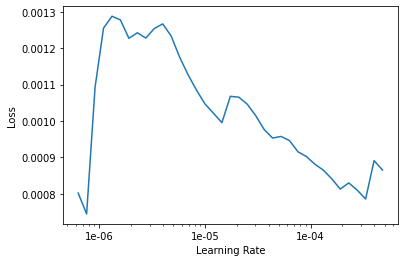

In [ ]:
# https://iconof.com/1cycle-learning-rate-policy/
# Syntax Details: https://docs.fast.ai/callback.schedule.html#Learner.fit_one_cycle
learn.fit_one_cycle(30)

# https://docs.fast.ai/learner.html#Learner.save
learn.save('stage-1')
learn.unfreeze()

#loss versus the learning rates. We're interested in finding a good order of magnitude of learning rate
learn.lr_find()

learn.recorder.plot()

In [ ]:
# Second Layer
learn.fit_one_cycle(30, max_lr=slice(3e-5,3e-4))
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.000941,0.000142,0.000000,00:06
1,0.002113,0.000105,0.000000,00:05
2,0.002449,0.000069,0.000000,00:05
3,0.002031,0.000050,0.000000,00:06
4,0.001574,0.000052,0.000000,00:06
5,0.001390,0.000144,0.000000,00:06
6,0.001238,0.000125,0.000000,00:06
7,0.001436,0.000010,0.000000,00:05
8,0.001267,0.000119,0.000000,00:06
9,0.002971,0.000231,0.000000,00:05


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


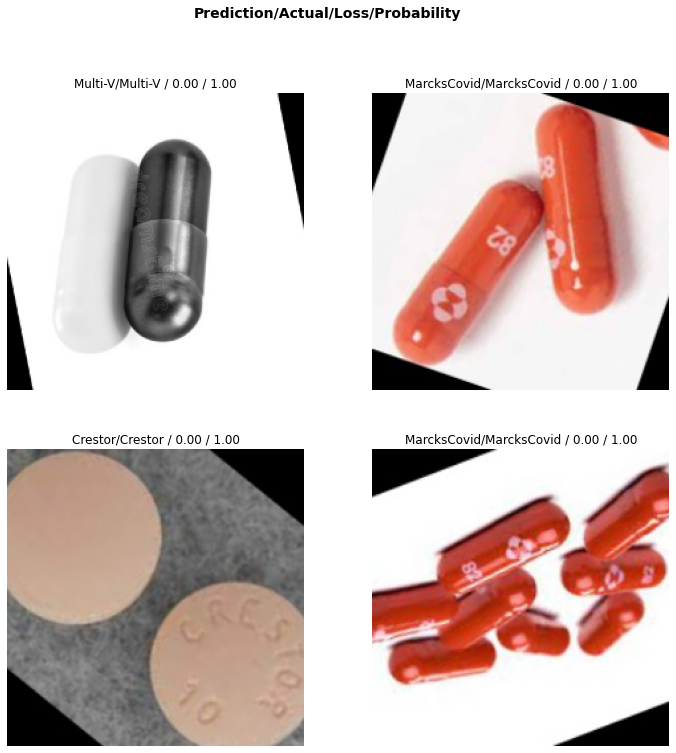

In [ ]:
# Load Model, Stage2, Display most confused if any..
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()
interp.plot_top_losses(4)

In [ ]:
# https://fastai1.fast.ai/widgets.image_cleaner.html
from fastai.widgets import ImageCleaner, DatasetFormatter
from fastai import *
losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]
print(top_loss_paths)
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )
print(db)

In [ ]:
# Format data using above widget 
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [ ]:
# Get the image stats, and load the data
classes = ['Cofsils', 'Crestor', 'Dolo', 'MarcksCovid', 'Multi-V', 'Penicillium','Synthroid']

data1 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)
learn1 = cnn_learner(data1, models.resnet34)
learn1.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/Dataset;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
 

In [ ]:
# Simply upload any relavent image, and send to model
img = open_image('image.jpeg')
pred_class, pred_idx, outputs = learn1.predict(img)
print(pred_class)


Crestor


In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      // await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
import time
from IPython.display import Image, display
while True:
  # load a single image
  new_image = take_photo()
  img = open_image(new_image)
  display(Image(new_image))
  pred_class, pred_idx, outputs = learn1.predict(img)
  print(pred_class)
  time.sleep(20)


In [ ]:
# Export model if accurate else retrain with more epoch
learn1.export()

In [1]:
# Copy model to google colab and download it
from google.colab import drive
drive.mount('drive')
!cp "/content/Dataset/models/stage-2.pth" "drive/My Drive/Model_30_06"

MessageError: ignored

In [ ]:
!cp "/content/Dataset/export.pkl" "drive/My Drive/Model_30_06"